In [77]:
import numpy as np
import pandas as pd

In [78]:
data = pd.read_csv("Groceries_dataset.csv")

In [79]:
data.shape

(38765, 3)

In [80]:
data.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [81]:
data[data.Member_number == 1000][:]

,Member_number,Date,itemDescription
1629,1000,27-05-2015,soda
2047,1000,24-07-2015,canned beer
4843,1000,15-03-2015,sausage
6388,1000,25-11-2015,sausage
8395,1000,15-03-2015,whole milk
13331,1000,24-06-2014,whole milk
17778,1000,27-05-2015,pickled vegetables
18196,1000,24-07-2015,misc. beverages
20992,1000,15-03-2015,semi-finished bread
22537,1000,25-11-2015,hygiene articles


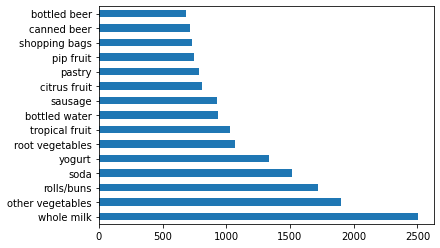

In [82]:
# data['itemDescription'].value_counts()[:20].plot()
data['itemDescription'].value_counts()[:15].plot(kind = 'barh')

In [83]:
data_new = data.groupby(['Member_number','Date']).size().reset_index().rename(columns={0:'count'})

In [84]:
# Can use Split-Group-Combine
data_new.shape

(14963, 3)

In [85]:
data_new

,Member_number,Date,count
0,1000,15-03-2015,4
1,1000,24-06-2014,3
2,1000,24-07-2015,2
3,1000,25-11-2015,2
4,1000,27-05-2015,2
...,...,...,...
14958,4999,24-01-2015,6
14959,4999,26-12-2015,2
14960,5000,09-03-2014,2
14961,5000,10-02-2015,3


In [86]:
col = []
for i in range(data_new.shape[0]):
  col.append([])
data_new["List"] = col

In [87]:
data_new

,Member_number,Date,count,List
0,1000,15-03-2015,4,[]
1,1000,24-06-2014,3,[]
2,1000,24-07-2015,2,[]
3,1000,25-11-2015,2,[]
4,1000,27-05-2015,2,[]
...,...,...,...,...
14958,4999,24-01-2015,6,[]
14959,4999,26-12-2015,2,[]
14960,5000,09-03-2014,2,[]
14961,5000,10-02-2015,3,[]


In [88]:
for i in range(data_new.shape[0]):
  # print(data_new.iloc[i,0]," ",data_new.iloc[i,1])
  temp = data.loc[((data.Member_number == data_new.iloc[i,0]) & (data.Date == data_new.iloc[i,1])), ['itemDescription']]
  list = []
  for val in temp['itemDescription']:
    list.append(val)
  # print(list)
  data_new["List"][i].extend(list)

In [89]:
data_new

,Member_number,Date,count,List
0,1000,15-03-2015,4,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,3,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,2,"[canned beer, misc. beverages]"
3,1000,25-11-2015,2,"[sausage, hygiene articles]"
4,1000,27-05-2015,2,"[soda, pickled vegetables]"
...,...,...,...,...
14958,4999,24-01-2015,6,"[tropical fruit, berries, other vegetables, yo..."
14959,4999,26-12-2015,2,"[bottled water, herbs]"
14960,5000,09-03-2014,2,"[fruit/vegetable juice, onions]"
14961,5000,10-02-2015,3,"[soda, root vegetables, semi-finished bread]"
